<a href="https://colab.research.google.com/github/NicoD920/analisisDatosPrimavera2024/blob/main/Tarea_2_(R).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de paquetes e instalaciones, lo dejamos fuera para ir agregando de ser necesario

In [177]:
if(!require(haven)){install.packages("haven")}
if(!require(skimr)){install.packages("skimr")}
if(!require(dplyr)){install.packages("dplyr")}
if(!require(ggplot2)){install.packages("ggplot2")}
if(!require(rddtools)){install.packages("rddtools")}
if(!require(stargazer)){install.packages("stargazer")}
if(!require(modelsummary)){install.packages("modelsummary")}
if(!require(AER)){install.packages("AER")}
if(!require("sandwich")){install.packages("sandwich")}
if(!require("lmtest")){install.packages("lmtest")}
if(!require("plm")){install.packages("plm")}



library(haven)
library(readr)
library(skimr)
library(dplyr)
library(ggplot2)
library(rddtools)
library(stargazer)
library(modelsummary)
library(AER)
library(lmtest)
library(sandwich)
library(plm)


Loading required package: plm

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘miscTools’, ‘rbibutils’, ‘bdsmatrix’, ‘collapse’, ‘maxLik’, ‘Rdpack’



Attaching package: ‘plm’


The following objects are masked from ‘package:dplyr’:

    between, lag, lead




# Configuración general del entorno

Dejamos cargada la data en:
* data_base_diff (csv)
* data_base_vird (csv)
* data_base_vird_dta (dta)

## Entorno de trabajo en R

## Instalación de paquetes e importación

## Carga de datos

In [127]:
base_diff_in_diff <- "https://raw.githubusercontent.com/NicoD920/analisisDatosPrimavera2024/refs/heads/main/Tarea%202/Base%20(Diff%20in%20Diff).csv"
base_vi_rd <- "https://raw.githubusercontent.com/NicoD920/analisisDatosPrimavera2024/refs/heads/main/Tarea%202/Base%20(VI%2C%20RD).csv"
base_vi_rd_dta <- "https://github.com/NicoD920/analisisDatosPrimavera2024/raw/refs/heads/main/Tarea%202/Base%20(VI,%20RD).dta"


## Definición de datas
* data_base_diff (csv)
* data_base_vird (csv)
* data_base_vird_dta (dta)

In [128]:
data_base_diff <- read_csv(base_diff_in_diff)
head(data_base_diff)

New names:
• `` -> `...1`
Rows: 321 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (26): ...1, year, age, agesq, nbh, cbd, intst, lintst, price, rooms, are...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,year,age,agesq,nbh,cbd,intst,lintst,price,rooms,⋯,lprice,y81,larea,lland,y81ldist,lintstsq,nearinc,y81nrinc,rprice,lrprice
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1978,48,2304,4,3000,1000,6.9078,60000,7,⋯,11.00210,0,7.414573,8.429017,0,47.71770,1,0,60000,11.00210
2,1978,83,6889,4,4000,1000,6.9078,40000,6,⋯,10.59663,0,7.867871,9.032409,0,47.71770,1,0,40000,10.59663
3,1978,58,3364,4,4000,1000,6.9078,34000,6,⋯,10.43412,0,7.042286,8.517193,0,47.71770,1,0,34000,10.43412
4,1978,11,121,4,4000,1000,6.9078,63900,5,⋯,11.06507,0,7.035269,9.210340,0,47.71770,1,0,63900,11.06507
5,1978,48,2304,4,4000,2000,7.6009,44000,5,⋯,10.69195,0,7.532624,9.210340,0,57.77368,1,0,44000,10.69195
6,1978,78,6084,4,3000,2000,7.6009,46000,6,⋯,10.73640,0,7.484369,9.159047,0,57.77368,1,0,46000,10.73640


In [129]:
data_base_vird <- read_csv(base_vi_rd)
head(data_base_vird)



Rows: 30703 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ;nquest;anno;lnc;c;lncn;cn;lnjconsal;jconsal;y;y_real;w;af;pf;ar;ar...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


;nquest;anno;lnc;c;lncn;cn;lnjconsal;jconsal;y;y_real;w;af;pf;ar;ar1;famtype;children;children_0_2;children_3_5;children_6_11;children_12_14;children_15_18;ncomp;nperc;sizemun;region;qu_m;qu_f;esse_m;esse_f;elig_m;elig_f;educ_m;educ_f;eta_m;eta_f;valabit;godabit;supab;ancostr;job_m;job_f;lret_m;lret_f;acontrib_m;acontrib_f;n;N;home_owner;pop;rich;filthy_rich;sel;no_f;ed_m1;ed_m2;ed_m3;ed_m4;ed_m5;ed_m6;ed_f1;ed_f2;ed_f3;ed_f4;ed_f5;ed_f6;ed_f7;yob_m;yob_f;coh_m;coh_f;co_m1;co_m2;co_m3;co_m4;co_m5;co_m6;co_m7;co_m8;co_m9;co_m10;co_m11;co_m12;co_m13;co_f1;co_f2;co_f3;co_f4;co_f5;co_f6;co_f7;co_f8;co_f9;co_f10;co_f11;co_f12;co_f13;co_f14;sup2;w_fit;da1;da2;da3;da4;da5;da6;mda1;m1;mda2;m2;mda3;m3;mda4;m4;mda5;m5;mda6;m6;af_fit;af_rich;af_poor;w_rich;w_poor;w_terz;w_poor33;left;left_decoded;decoded_famtype;decoded_sizemun;decoded_region;decoded_qu_m;decoded_qu_f;decoded_elig_m;decoded_elig_f;decoded_educ_m;decoded_educ_f;decoded_godabit;decoded_job_m;decoded_job_f;decoded_lret_m;decoded_lret_f;decoded_left
<chr>
"1;25;1993;9,93779468536377;20698,0431448094;9,93779468536377;20698,0431448094;6,33774614334106;565,520304502988;38066,9580228209;41683,31640625;365522,305405847;43175,7318391438;8482,80456754482;330829,378134248;322346,573566703;1;0;0;0;0;0;0;6;2;2;4;0;0;-17;-20;0;0;4;4;41;39;226208,121801195;1;140;980;2;2;NA;NA;18;15;1;2;1;0;1;1;0;0;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;1952;1954;10;10;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;19600;NA;0;0;0;0;0;0;NA;0,0882294774055481;NA;0,157467857003212;NA;0,164193868637085;NA;0,193471804261208;NA;0,193273991346359;NA;0,203363001346588;NA;1;0;1;0;NA;0;1;kept;couple;between 20000 and 40000 residents;South;worker;worker;non eligible;non eligible;vocational studies;vocational studies;owner;publ empl;publ empl;"";"";kept"
"2;25;1995;10,3479804992676;31193,996705005;10,1669826507568;26029,4277141101;6,83477830886841;929,622418361076;47497,7137819233;47497,71484375;385567,708519469;62782,1465885401;23240,5604590269;346026,122389956;335696,984408166;1;0;0;0;0;0;0;5;2;2;4;0;0;-15;-18;0;0;5;5;43;41;258228,449544743;1;130;1986;2;2;NA;NA;20;17;2;2;1;0;1;1;0;0;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;1952;1954;10;10;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;16900;NA;0;0;0;0;0;0;NA;0,0882294774055481;NA;0,157467857003212;NA;0,164193868637085;NA;0,193471804261208;NA;0,193273991346359;NA;0,203363001346588;NA;1;0;1;0;NA;0;1;kept;couple;between 20000 and 40000 residents;South;worker;worker;non eligible;non eligible;upper secondary;upper secondary;owner;publ empl;publ empl;"";"";kept"
"3;34;1993;10,4320907592773;33931,2182701793;10,4320907592773;33931,2182701793;6,74321126937866;848,280456754482;57677,2151491787;63156,55078125;406710,840390086;96567,9111713653;0;310142,929218721;288415,355296524;1;1;0;0;0;0;0;4;2;2;2;1;0;7;15;1;1;6;5;50;49;180966,497440956;1;84;946;NA;2;2;NA;25;30;1;6;1;0;0;0;1;0;0;0;0;0;0;1;0;0;0;0;0;1;0;1943;1944;8;8;0;0;0;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;1;0;0;0;0;0;0;7056;296058,28125;0;0;0;0;0;0;NA;0,0882294774055481;NA;0,157467857003212;NA;0,164193868637085;NA;0,193471804261208;NA;0,193273991346359;NA;0,203363001346588;59420,609375;1;0;1;0;3;0;1;kept;couple;between 20000 and 40000 residents;North-east;retired;worker;eligible;eligible;college or higher;upper secondary;owner;"";publ empl;publ empl;"";kept"
"4;34;1995;10,8913831710815;53711,5175053066;10,6778087615967;43382,3795235169;6,65245676040649;774,68534863423;62045,7442753101;62045,74609375;441570,648721511;0;30987,4139453692;472558,06266688;464811,209180538;1;1;0;0;0;0;0;4;2;2;2;1;0;9;17;1;1;6;6;52;51;464811,209180538;1;130;1928;NA;2;2;NA;25;32;2;6;1;0;1;1;1;0;0;0;0;0;0;1;0;0;0;0;0;0;1;1943;1944;8;8;0;0;0;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;1;0;0;0;0;0;0;16900;434059,4375;0;0;0;0;0;0;NA;0,0882294774055481;NA;0,157467857003212;NA;0,164193868637085;NA;0,193471804261208;NA;0,193273991346359;NA;0,203363001346588;69620,25;1;0;1;0;3;0;1;kept;couple;between

In [130]:
data_base_vird_dta <- read_dta(base_vi_rd_dta)
head(data_base_vird_dta)

nquest,anno,lnc,c,lncn,cn,lnjconsal,jconsal,y,y_real,⋯,decoded_elig_m,decoded_elig_f,decoded_educ_m,decoded_educ_f,decoded_godabit,decoded_job_m,decoded_job_f,decoded_lret_m,decoded_lret_f,decoded_left
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
25,1993,9.937795,20698.04,9.937795,20698.04,6.337746,565.5203,38066.96,41683.32,⋯,non eligible,non eligible,vocational studies,vocational studies,owner,publ empl,publ empl,,,kept
25,1995,10.347980,31194.00,10.166983,26029.43,6.834778,929.6224,47497.71,47497.71,⋯,non eligible,non eligible,upper secondary,upper secondary,owner,publ empl,publ empl,,,kept
34,1993,10.432091,33931.22,10.432091,33931.22,6.743211,848.2805,57677.22,63156.55,⋯,eligible,eligible,college or higher,upper secondary,owner,,publ empl,publ empl,,kept
34,1995,10.891383,53711.52,10.677809,43382.38,6.652457,774.6853,62045.74,62045.75,⋯,eligible,eligible,college or higher,college or higher,owner,,publ empl,publ empl,,kept
34,1998,11.315439,82079.15,11.184411,71999.26,7.426539,1679.9826,79761.60,74130.43,⋯,non eligible,eligible,college or higher,college or higher,owner,SE,publ empl,,,kept
34,2000,11.015616,60816.52,10.757788,46994.58,7.519109,1842.9248,79347.92,70786.28,⋯,eligible,eligible,college or higher,college or higher,owner,publ empl,publ empl,,,kept


In [131]:

# skim(data_base_diff)
# kim(data_base_vird)
# skim(data_base_vird_dta)
# summary(data_base_diff)
# summary(data_base_vird)
# summary(data_base_vird_dta)
# str(data_base_diff)
# str(data_base_vird)
# str(data_base_vird_dta)

# Mirada Inicial EDA

## data_base_diff

In [132]:
head(data_base_diff)


...1,year,age,agesq,nbh,cbd,intst,lintst,price,rooms,⋯,lprice,y81,larea,lland,y81ldist,lintstsq,nearinc,y81nrinc,rprice,lrprice
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1978,48,2304,4,3000,1000,6.9078,60000,7,⋯,11.00210,0,7.414573,8.429017,0,47.71770,1,0,60000,11.00210
2,1978,83,6889,4,4000,1000,6.9078,40000,6,⋯,10.59663,0,7.867871,9.032409,0,47.71770,1,0,40000,10.59663
3,1978,58,3364,4,4000,1000,6.9078,34000,6,⋯,10.43412,0,7.042286,8.517193,0,47.71770,1,0,34000,10.43412
4,1978,11,121,4,4000,1000,6.9078,63900,5,⋯,11.06507,0,7.035269,9.210340,0,47.71770,1,0,63900,11.06507
5,1978,48,2304,4,4000,2000,7.6009,44000,5,⋯,10.69195,0,7.532624,9.210340,0,57.77368,1,0,44000,10.69195
6,1978,78,6084,4,3000,2000,7.6009,46000,6,⋯,10.73640,0,7.484369,9.159047,0,57.77368,1,0,46000,10.73640


In [133]:
str(data_base_diff)

spc_tbl_ [321 × 26] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ...1    : num [1:321] 1 2 3 4 5 6 7 8 9 10 ...
 $ year    : num [1:321] 1978 1978 1978 1978 1978 ...
 $ age     : num [1:321] 48 83 58 11 48 78 22 78 42 41 ...
 $ agesq   : num [1:321] 2304 6889 3364 121 2304 ...
 $ nbh     : num [1:321] 4 4 4 4 4 4 4 4 4 4 ...
 $ cbd     : num [1:321] 3000 4000 4000 4000 4000 3000 4000 3000 3000 3000 ...
 $ intst   : num [1:321] 1000 1000 1000 1000 2000 2000 2000 2000 2000 2000 ...
 $ lintst  : num [1:321] 6.91 6.91 6.91 6.91 7.6 ...
 $ price   : num [1:321] 60000 40000 34000 63900 44000 46000 56000 38500 60500 55000 ...
 $ rooms   : num [1:321] 7 6 6 5 5 6 6 6 8 5 ...
 $ area    : num [1:321] 1660 2612 1144 1136 1868 ...
 $ land    : num [1:321] 4578 8370 5000 10000 10000 ...
 $ baths   : num [1:321] 1 2 1 1 1 3 2 2 2 2 ...
 $ dist    : num [1:321] 10700 11000 11500 11900 12100 10000 11700 10200 10500 11000 ...
 $ ldist   : num [1:321] 9.28 9.31 9.35 9.38 9.4 ...
 $ wind    : num [1:321] 

In [134]:
summary(data_base_diff)

      ...1          year           age             agesq            nbh       
 Min.   :  1   Min.   :1978   Min.   :  0.00   Min.   :    0   Min.   :0.000  
 1st Qu.: 81   1st Qu.:1978   1st Qu.:  0.00   1st Qu.:    0   1st Qu.:0.000  
 Median :161   Median :1978   Median :  4.00   Median :   16   Median :2.000  
 Mean   :161   Mean   :1979   Mean   : 18.01   Mean   : 1382   Mean   :2.209  
 3rd Qu.:241   3rd Qu.:1981   3rd Qu.: 22.00   3rd Qu.:  484   3rd Qu.:4.000  
 Max.   :321   Max.   :1981   Max.   :189.00   Max.   :35721   Max.   :6.000  
      cbd            intst           lintst           price       
 Min.   : 1000   Min.   : 1000   Min.   : 6.908   Min.   : 26000  
 1st Qu.: 9000   1st Qu.: 9000   1st Qu.: 9.105   1st Qu.: 65000  
 Median :14000   Median :16000   Median : 9.680   Median : 85900  
 Mean   :15822   Mean   :16442   Mean   : 9.481   Mean   : 96101  
 3rd Qu.:23000   3rd Qu.:24000   3rd Qu.:10.086   3rd Qu.:120000  
 Max.   :35000   Max.   :34000   Max.   :10.4

In [135]:
# Calcular valores faltantes por columna
missing_values_diff <- colSums(is.na(data_base_diff))

# Convertir a data frame para mejor visualización
missing_df_diff <- data.frame(
  Column = names(missing_values_diff),
  MissingCount = missing_values_diff
)

# Ordenar de mayor a menor cantidad de valores faltantes
missing_df_diff<- missing_df_diff[order(-missing_df_diff$MissingCount), ]

# Mostrar las primeras filas del resumen
head(missing_df_diff)


,Column,MissingCount
,<chr>,<dbl>
...1,...1,0
year,year,0
age,age,0
agesq,agesq,0
nbh,nbh,0
cbd,cbd,0


## data_base_vird

In [136]:
head(data_base_vird_dta)

nquest,anno,lnc,c,lncn,cn,lnjconsal,jconsal,y,y_real,⋯,decoded_elig_m,decoded_elig_f,decoded_educ_m,decoded_educ_f,decoded_godabit,decoded_job_m,decoded_job_f,decoded_lret_m,decoded_lret_f,decoded_left
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
25,1993,9.937795,20698.04,9.937795,20698.04,6.337746,565.5203,38066.96,41683.32,⋯,non eligible,non eligible,vocational studies,vocational studies,owner,publ empl,publ empl,,,kept
25,1995,10.347980,31194.00,10.166983,26029.43,6.834778,929.6224,47497.71,47497.71,⋯,non eligible,non eligible,upper secondary,upper secondary,owner,publ empl,publ empl,,,kept
34,1993,10.432091,33931.22,10.432091,33931.22,6.743211,848.2805,57677.22,63156.55,⋯,eligible,eligible,college or higher,upper secondary,owner,,publ empl,publ empl,,kept
34,1995,10.891383,53711.52,10.677809,43382.38,6.652457,774.6853,62045.74,62045.75,⋯,eligible,eligible,college or higher,college or higher,owner,,publ empl,publ empl,,kept
34,1998,11.315439,82079.15,11.184411,71999.26,7.426539,1679.9826,79761.60,74130.43,⋯,non eligible,eligible,college or higher,college or higher,owner,SE,publ empl,,,kept
34,2000,11.015616,60816.52,10.757788,46994.58,7.519109,1842.9248,79347.92,70786.28,⋯,eligible,eligible,college or higher,college or higher,owner,publ empl,publ empl,,,kept


In [137]:
str(data_base_vird_dta)

tibble [30,703 × 142] (S3: tbl_df/tbl/data.frame)
 $ nquest         : num [1:30703] 25 25 34 34 34 34 34 34 123 123 ...
  ..- attr(*, "label")= chr "family id"
  ..- attr(*, "format.stata")= chr "%12.0g"
 $ anno           : num [1:30703] 1993 1995 1993 1995 1998 ...
  ..- attr(*, "label")= chr "year"
  ..- attr(*, "format.stata")= chr "%9.0g"
 $ lnc            : num [1:30703] 9.94 10.35 10.43 10.89 11.32 ...
  ..- attr(*, "label")= chr "log(total expenditure)"
  ..- attr(*, "format.stata")= chr "%9.0g"
 $ c              : num [1:30703] 20698 31194 33931 53712 82079 ...
  ..- attr(*, "label")= chr "total expenditure"
  ..- attr(*, "format.stata")= chr "%10.0g"
 $ lncn           : num [1:30703] 9.94 10.17 10.43 10.68 11.18 ...
  ..- attr(*, "label")= chr "log(total non durable expenditure)"
  ..- attr(*, "format.stata")= chr "%9.0g"
 $ cn             : num [1:30703] 20698 26029 33931 43382 71999 ...
  ..- attr(*, "label")= chr "total non durable expenditure"
  ..- attr(*, "format.stata")

In [138]:
summary(data_base_vird_dta)

     nquest            anno           lnc               c           
 Min.   :    25   Min.   :1993   Min.   : 6.729   Min.   :   836.7  
 1st Qu.: 51399   1st Qu.:1995   1st Qu.: 9.410   1st Qu.: 12214.1  
 Median :504751   Median :2000   Median : 9.722   Median : 16682.8  
 Mean   :377377   Mean   :1999   Mean   : 9.744   Mean   : 19526.7  
 3rd Qu.:638286   3rd Qu.:2002   3rd Qu.:10.073   3rd Qu.: 23705.4  
 Max.   :688520   Max.   :2004   Max.   :12.706   Max.   :329823.8  
                                                                    
      lncn              cn             lnjconsal        jconsal      
 Min.   : 6.729   Min.   :   836.7   Min.   :2.335   Min.   :   0.0  
 1st Qu.: 9.368   1st Qu.: 11705.2   1st Qu.:5.736   1st Qu.: 309.9  
 Median : 9.654   Median : 15582.7   Median :6.050   Median : 424.1  
 Mean   : 9.671   Mean   : 17768.2   Mean   :6.019   Mean   : 460.9  
 3rd Qu.: 9.970   3rd Qu.: 21374.6   3rd Qu.:6.342   3rd Qu.: 568.1  
 Max.   :12.706   Max.   :32

In [139]:
# Calcular valores faltantes por columna
missing_values_vird_dta <- colSums(is.na(data_base_vird_dta))

# Convertir a data frame para mejor visualización
missing_df_vird_dta <- data.frame(
  Column = names(missing_values_vird_dta),
  MissingCount = missing_values_vird_dta
)

# Ordenar de mayor a menor cantidad de valores faltantes
missing_df_vird_dta <- missing_df_vird_dta[order(-missing_df_vird_dta$MissingCount), ]

# Mostrar las primeras filas del resumen
head(missing_df_vird_dta)


,Column,MissingCount
,<chr>,<dbl>
lret_f,lret_f,26586
mda1,mda1,25648
mda2,mda2,25648
mda3,mda3,25648
mda4,mda4,25648
mda5,mda5,25648


# Parte 1

## Parte 1.1: Contexto y preparación

### 1. Hipótesis












El efecto del retiro en el consumo de los hogares parece ser un tema de interés para numerosos analistas y economistas. En este caso, nos enfocamos principalmente en lo planteado por dos documentos: "The Retirement Consumption Puzzle in China" (Li, Shi y Wu, 2015) y "The Retirement-Consumption Puzzle and Involuntary Early Retirement: Evidence from the British Household Panel Survey" (Smith, 2006).

En el estudio de Li, Shi y Wu (2015), se señala que la jubilación reduce el gasto total en bienes no duraderos en un 20%, especialmente en categorías relacionadas con el trabajo y la alimentación en el hogar. Por su parte, Sarah Smith (2006) muestra que la caída en el consumo es particularmente significativa entre los jubilados involuntarios.

Si bien estos dos documentos llegan a conclusiones ligeramente diferentes, ambos comparten la observación de que la jubilación, en particular a edades tempranas, tiende a estar asociada con una disminución del consumo.

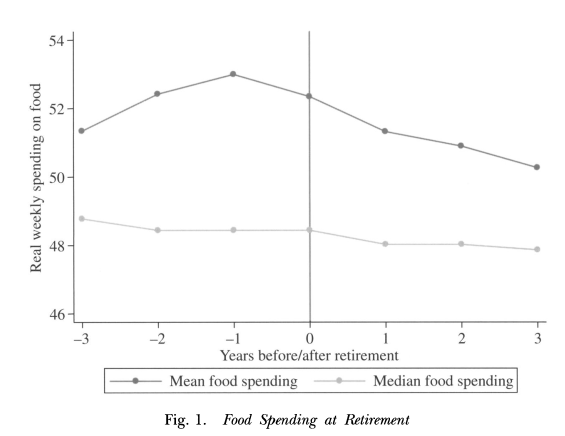

Con base en lo señalado anteriormente, formulamos la siguiente hipótesis: "El consumo del hogar se ve disminuido considerablemente con la jubilación del jefe de hogar debido a la reducción en los ingresos disponibles"

Fuentes:

[1] Li, H., Shi, X., & Wu, B. (2015). The Retirement Consumption Puzzle in China. The American Economic Review, 105(5), 437–441. http://www.jstor.org/stable/43821923

[2] Smith, S. (2006). The Retirement-Consumption Puzzle and Involuntary Early Retirement: Evidence from the British Household Panel Survey. The Economic Journal, 116(510), C130–C148. http://www.jstor.org/stable/3590417

### 2. Construcción de bases de datos colapsada

Creamos la variable de elegibilidad, 1 si cumple la edad minima, 0 en caso contrario

In [140]:
# Crear variable de elegibilidad
data_base_vird_dta <- data_base_vird_dta %>%
  mutate(
    eligm = ifelse(esse_m >= 0, 1, 0)  # 1 si cumple la edad mínima, 0 en caso contrario
  )




In [141]:
head(data_base_vird_dta)

nquest,anno,lnc,c,lncn,cn,lnjconsal,jconsal,y,y_real,⋯,decoded_elig_f,decoded_educ_m,decoded_educ_f,decoded_godabit,decoded_job_m,decoded_job_f,decoded_lret_m,decoded_lret_f,decoded_left,eligm
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
25,1993,9.937795,20698.04,9.937795,20698.04,6.337746,565.5203,38066.96,41683.32,⋯,non eligible,vocational studies,vocational studies,owner,publ empl,publ empl,,,kept,0
25,1995,10.347980,31194.00,10.166983,26029.43,6.834778,929.6224,47497.71,47497.71,⋯,non eligible,upper secondary,upper secondary,owner,publ empl,publ empl,,,kept,0
34,1993,10.432091,33931.22,10.432091,33931.22,6.743211,848.2805,57677.22,63156.55,⋯,eligible,college or higher,upper secondary,owner,,publ empl,publ empl,,kept,1
34,1995,10.891383,53711.52,10.677809,43382.38,6.652457,774.6853,62045.74,62045.75,⋯,eligible,college or higher,college or higher,owner,,publ empl,publ empl,,kept,1
34,1998,11.315439,82079.15,11.184411,71999.26,7.426539,1679.9826,79761.60,74130.43,⋯,eligible,college or higher,college or higher,owner,SE,publ empl,,,kept,0
34,2000,11.015616,60816.52,10.757788,46994.58,7.519109,1842.9248,79347.92,70786.28,⋯,eligible,college or higher,college or higher,owner,publ empl,publ empl,,,kept,1


Agrupamos los datos por año y ese_m y se realiza calculo de promedios de las variables clave.

En esta parte tomamos en cuenta el incorporar las siguientes 4 variables:
* acontrib_m (Años de contribucióna a la jubilación): Esta variable puede ser adecuada al señalar de cierta forma, la preparación que tivieron los indivuos ante su eventual jubilación.
* educ_m (Nivel de educación del jefe de hogar): Señala el nivel de educación del jefe de hogar, lo que puede indicar comportamiento de ahorro debido a la educación o mejor administración de recursos.
* sizemun (Tamaño de la población local): Esta variable toma en cuenta la población local, ya que puede hacer referencia a hogares en zonas más urbanas y hogares en zonas más rurales, tomando en cuenta esto y que en las zonas rurales, se podŕia esperar que su consumo no dependa tanto de los ingresos dado el consumo loca y propio, puede ser interesante de analizar.
* pf (Deudas): Esta variable la tomamos en cuenta ya que tal vez el comportamiento posterior a lajubilación puede estar determinado por la gestión previa de recursos y que impactan en la presencia de deudas.

In [142]:
# Actualizar la base colapsada sin duplicar elegibilidad
base_agrupada_vird_dta <- data_base_vird_dta %>%
  group_by(anno, esse_m) %>%  # Agrupar por año y "esse_m"
  summarise(
    lnc_mean = mean(lnc, na.rm = TRUE),            # Promedio de lnc
    lncn_mean = mean(lncn, na.rm = TRUE),          # Promedio de lncn
    lnconsal_mean = mean(lnjconsal, na.rm = TRUE), # Promedio de lnconsal
    porcentajeretirados = mean(qu_m, na.rm = TRUE), # Promedio de qum
    elig_m_mean = mean(elig_m, na.rm = TRUE),      # Promedio de elegibilidad
    acontrib_m_mean = mean(acontrib_m, na.rm = TRUE),        # Promedio de años de contribución a la pensión
    educ_m_mean = mean(educ_m, na.rm = TRUE),      # Promedio de educ_m
    sizemun_mean = mean(sizemun, na.rm = TRUE),            # Promedio tamaño de la municipalidad
    pf_mean = mean(pf, na.rm = TRUE),      # Promedio de region
    n = n()                                        # Número de observaciones por grupo
  ) #%>%
  # filter(esse_m >= -10 & esse_m <= 10)  # Filtrar rango de "esse_m"


`summarise()` has grouped output by 'anno'. You can override using the
`.groups` argument.


In [143]:
summary(base_agrupada_vird_dta)

      anno          esse_m           lnc_mean        lncn_mean     
 Min.   :1993   Min.   :-39.000   Min.   : 8.301   Min.   : 8.301  
 1st Qu.:1995   1st Qu.:-16.000   1st Qu.: 9.614   1st Qu.: 9.556  
 Median :2000   Median :  6.000   Median : 9.701   Median : 9.635  
 Mean   :1999   Mean   :  5.662   Mean   : 9.687   Mean   : 9.620  
 3rd Qu.:2002   3rd Qu.: 27.000   3rd Qu.: 9.795   3rd Qu.: 9.727  
 Max.   :2004   Max.   : 49.000   Max.   :10.327   Max.   :10.187  
 lnconsal_mean   porcentajeretirados  elig_m_mean     acontrib_m_mean
 Min.   :4.861   Min.   :0.0000      Min.   :0.0000   Min.   : 0.00  
 1st Qu.:5.866   1st Qu.:0.0000      1st Qu.:0.0000   1st Qu.:19.95  
 Median :5.994   Median :0.6708      Median :1.0000   Median :33.17  
 Mean   :5.972   Mean   :0.5154      Mean   :0.5596   Mean   :28.38  
 3rd Qu.:6.108   3rd Qu.:1.0000      3rd Qu.:1.0000   3rd Qu.:37.00  
 Max.   :7.203   Max.   :1.0000      Max.   :1.0000   Max.   :56.00  
  educ_m_mean     sizemun_mean    

Filtramos para incluir solo los hogares en el rango de interes

In [144]:
# Filtrar para incluir solo hogares en el rango de interés
base_colapsada_vird_dta <- base_agrupada_vird_dta %>%
  filter(esse_m >= -10 & esse_m <= 10)




In [145]:
head(base_colapsada_vird_dta)

anno,esse_m,lnc_mean,lncn_mean,lnconsal_mean,porcentajeretirados,elig_m_mean,acontrib_m_mean,educ_m_mean,sizemun_mean,pf_mean,n
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1993,-10,9.818808,9.758461,6.270775,0.04444444,0,25.35556,3.088889,1.666667,3064.617,45
1993,-9,9.724754,9.688652,6.245466,0.04081633,0,25.93878,3.040816,1.306122,5257.377,49
1993,-8,9.898612,9.811594,6.302601,0.00000000,0,27.08333,3.041667,1.625000,1757.826,24
1993,-7,9.849893,9.792070,6.265036,0.01470588,0,28.41176,2.852941,1.411765,2149.784,68
1993,-6,9.795966,9.735604,6.165906,0.09523810,0,27.95238,2.714286,1.571429,1696.561,21
1993,-5,9.964823,9.921431,6.368767,0.08823529,0,29.73529,3.088235,1.705882,2112.385,34


In [146]:
summary(base_colapsada_vird_dta)

      anno          esse_m       lnc_mean       lncn_mean     lnconsal_mean  
 Min.   :1993   Min.   :-10   Min.   :9.523   Min.   :9.467   Min.   :5.893  
 1st Qu.:1995   1st Qu.: -5   1st Qu.:9.727   1st Qu.:9.667   1st Qu.:6.023  
 Median :1999   Median :  0   Median :9.795   Median :9.723   Median :6.108  
 Mean   :1999   Mean   :  0   Mean   :9.795   Mean   :9.727   Mean   :6.101  
 3rd Qu.:2002   3rd Qu.:  5   3rd Qu.:9.860   3rd Qu.:9.797   3rd Qu.:6.171  
 Max.   :2004   Max.   : 10   Max.   :9.995   Max.   :9.921   Max.   :6.369  
 porcentajeretirados  elig_m_mean     acontrib_m_mean  educ_m_mean   
 Min.   :0.00000     Min.   :0.0000   Min.   :24.78   Min.   :2.390  
 1st Qu.:0.05884     1st Qu.:0.0000   1st Qu.:29.36   1st Qu.:2.900  
 Median :0.33514     Median :0.0000   Median :31.49   Median :3.094  
 Mean   :0.40061     Mean   :0.4762   Mean   :31.34   Mean   :3.149  
 3rd Qu.:0.70147     3rd Qu.:1.0000   3rd Qu.:33.56   3rd Qu.:3.322  
 Max.   :0.98611     Max.   :1.000

El proceso de construcción de la base contempló:

* Agrupación: Los datos se agruparon por las variables anno y esse_m
* Cálculo de promedios: Se calcularion los promedios de las variables relevantes y el promedio de qum para construir la variable *porcentajeretirados*
* Filtrado: Se inluyeron solamente las combinaciones de esse_m en el rango [-10,10].

Respecto de la unidad de análisis de la base colpasada, corresponde a la combinación única de año y diferencia en años respecto de la edad mínima de jubilación, por lo que se toman en cuenta los hogares que cumplen con pertenecer a un año específico y tener al jefe de hogar con igual diferencia de edad respecto de su jubilación.


## Parte 1.2: Diseño de Regresión Discontinua

### Parte 1.2.2

En esta parte vamos a verificar si se cumplen los supuestos de Sharp y RD:

* Asignación exacta del tratamiento: La elegibilidad del tratamiento (eligm)depende únicamente de si la variable continua (esse_m) cruza un umbral conocido (esse_m = 0)
* No manipulación del umbral: Los individuos no deben tener control sobre la variable continua (esse_m) para ubicarse por encima o debajo del umbral.
* Continuidad den las covariables: Las variables no relacionadas con el tratamiento deben ser continuas alrededor del umbral. Esto garantiza que las discontinuidades observadas en la variable dependiente sean atribuibles al tratamiento
* Continuidad del resultado en ausencia de tratamiento: Si no hay tratamiento, la relación entra la variable continua (esse_m) y la variable dependente (lnc) deberia ser suave y continua alrededor del umbral
* Discontinuidad en la probabilidad del tratamiento: La probabilidad de recibir el tratamiento debe cambiar apruptamente en el umbral. En un diseño Sharp RD, este cambio es de 0 a 100.

#### Discontinuidad en la variable dependiente *lnc*

`geom_smooth()` using formula = 'y ~ x'


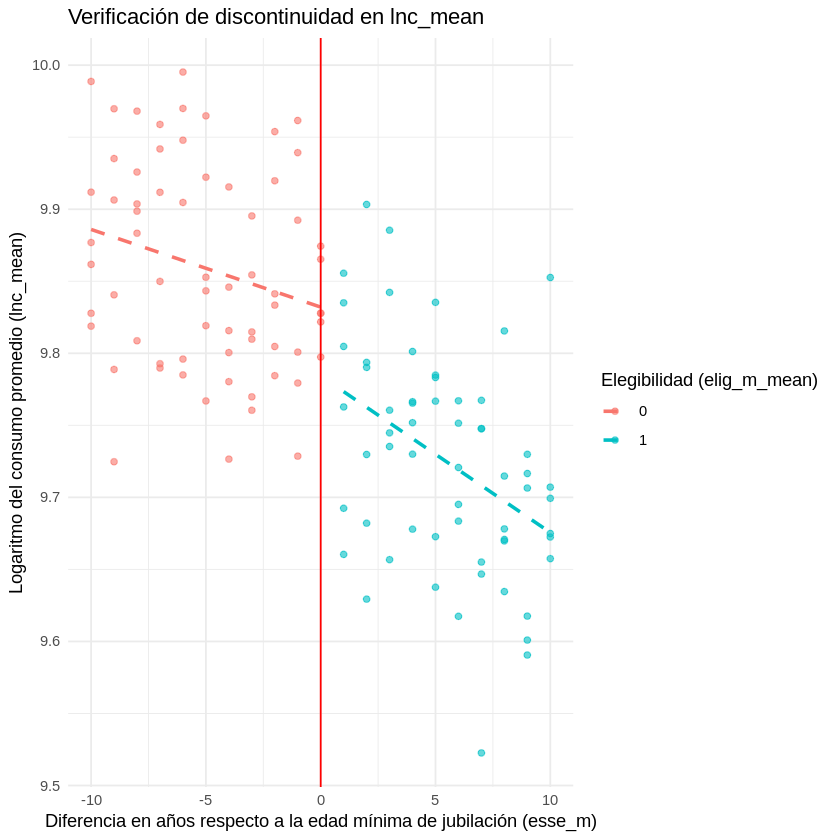

In [147]:
# Gráfico para verificar discontinuidad en lnc_mean
ggplot(base_colapsada_vird_dta, aes(x = esse_m, y = lnc_mean, color = as.factor(elig_m_mean))) +
  geom_point(alpha = 0.6) +                              # Puntos de datos
  geom_smooth(method = "lm", se = FALSE, linetype = "dashed") + # Regresión lineal separada
  geom_vline(xintercept = 0, linetype = "solid", color = "red") + # Umbral en esse_m = 0
  labs(
    title = "Verificación de discontinuidad en lnc_mean",
    x = "Diferencia en años respecto a la edad mínima de jubilación (esse_m)",
    y = "Logaritmo del consumo promedio (lnc_mean)",
    color = "Elegibilidad (elig_m_mean)"
  ) +
  theme_minimal()



Hay una clara dicontinuidad en el umbral, la caída es clara cuando se pasa de valores negativos a posiivos y sugiere que la jubilación tiene un impacto negativo en el consumo promedio

#### Continuidad de las covariables

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


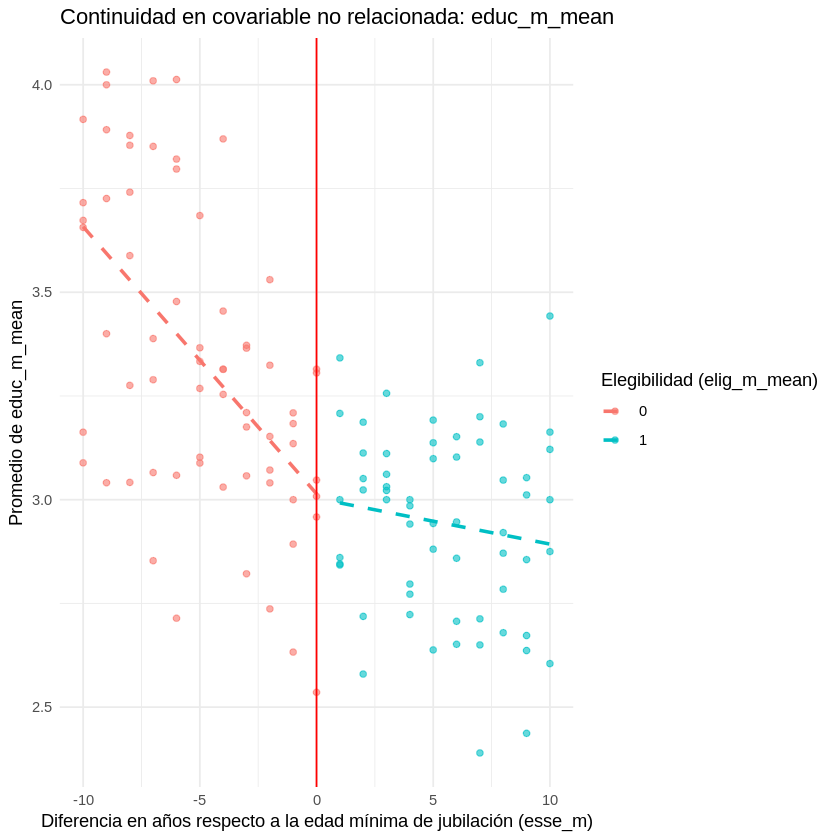

`geom_smooth()` using formula = 'y ~ x'


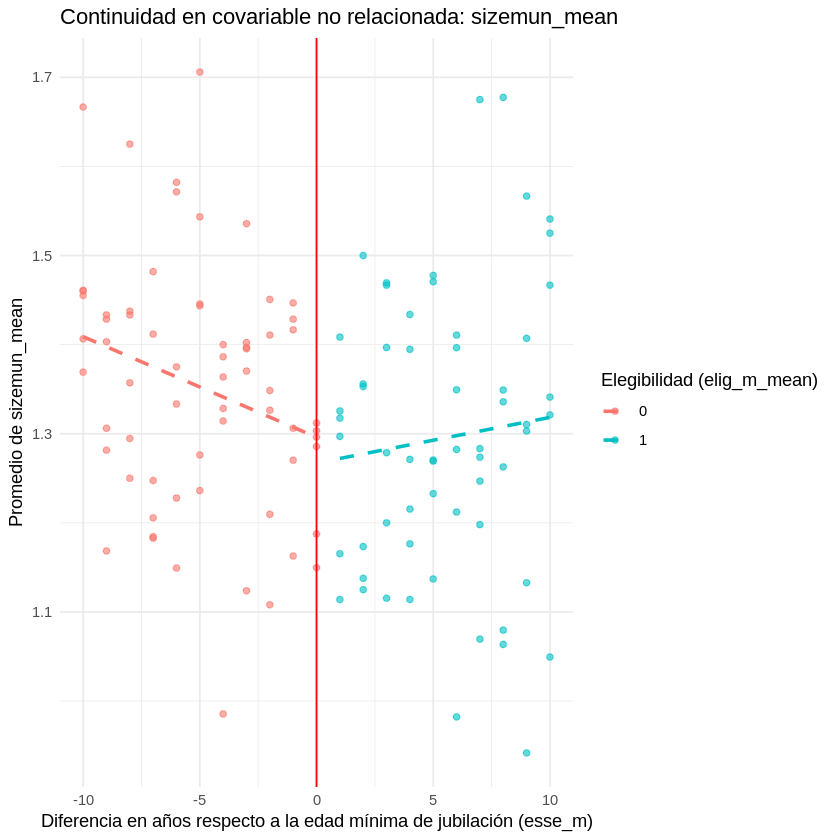

`geom_smooth()` using formula = 'y ~ x'


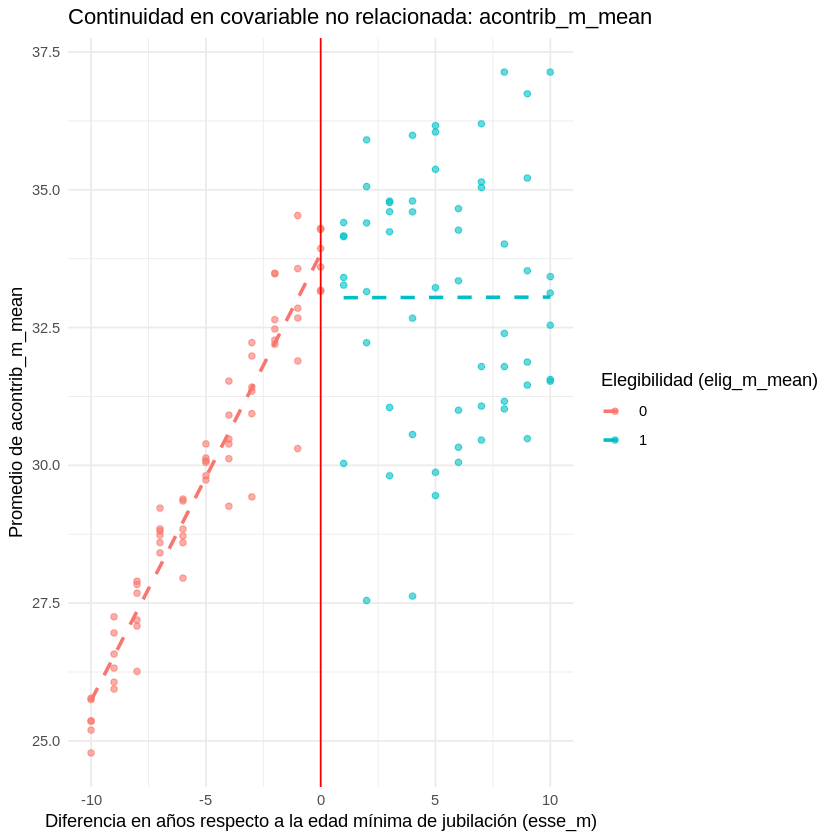

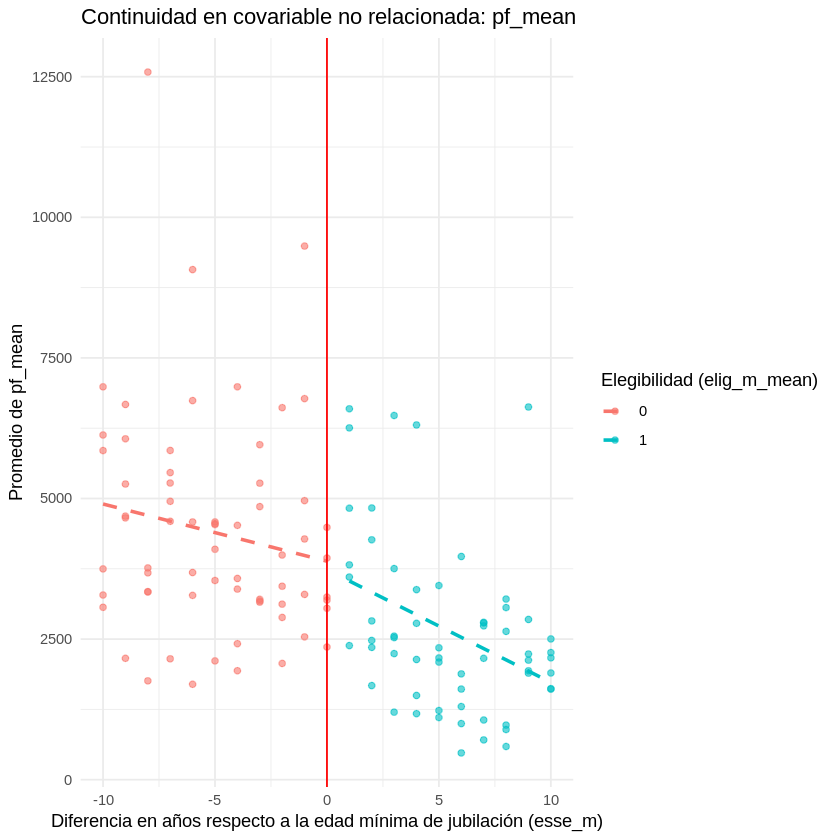

In [148]:
# Lista de covariables no relacionadas seleccionadas
covariables_no_relacionadas <- c("educ_m_mean", "sizemun_mean", "acontrib_m_mean", "pf_mean")

# Crear gráficos para cada covariable
for (cov in covariables_no_relacionadas) {
  print(
    ggplot(base_colapsada_vird_dta, aes(x = esse_m, y = .data[[cov]], color = as.factor(elig_m_mean))) +
      geom_point(alpha = 0.6) +                              # Puntos de datos
      geom_smooth(method = "lm", se = FALSE, linetype = "dashed") + # Regresión lineal separada
      geom_vline(xintercept = 0, linetype = "solid", color = "red") + # Umbral en esse_m = 0
      labs(
        title = paste("Continuidad en covariable no relacionada:", cov),
        x = "Diferencia en años respecto a la edad mínima de jubilación (esse_m)",
        y = paste("Promedio de", cov),
        color = "Elegibilidad (elig_m_mean)"
      ) +
      theme_minimal()
  )
}



Estas variables no muestran discontinudades significativas en el umbral y sugiere que no están relacionadas con el tratamiento. Estos gráficos confirman la continuidad necesaria para respaldar el diseño de sharp RD

#### Discontinuidad en la probabilidad del tratamiento

`geom_smooth()` using formula = 'y ~ x'


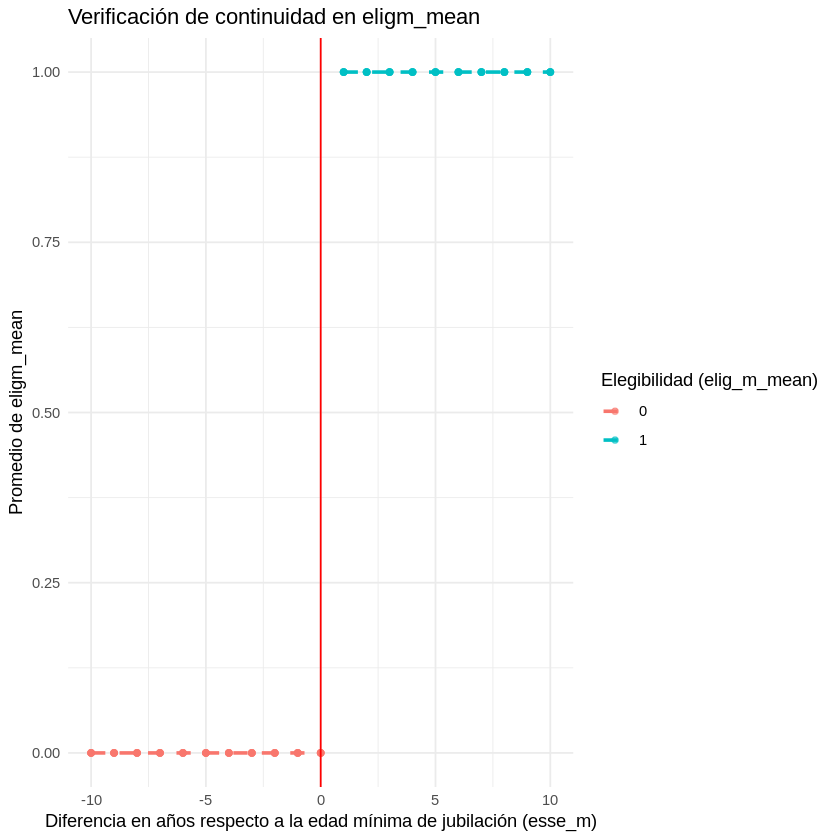

In [149]:
# Gráfico para eligm_mean
ggplot(base_colapsada_vird_dta, aes(x = esse_m, y = elig_m_mean, color = as.factor(elig_m_mean))) +
  geom_point(alpha = 0.6) +                              # Puntos de datos
  geom_smooth(method = "lm", se = FALSE, linetype = "dashed") + # Regresión lineal separada
  geom_vline(xintercept = 0, linetype = "solid", color = "red") + # Umbral en esse_m = 0
  labs(
    title = "Verificación de continuidad en eligm_mean",
    x = "Diferencia en años respecto a la edad mínima de jubilación (esse_m)",
    y = "Promedio de eligm_mean",
    color = "Elegibilidad (elig_m_mean)"
  ) +
  theme_minimal()


Este gráfico responde al supuesto de discontinuidad en la probabilidad de tratamiento, se observa un salto de 0% a 100% lo que corrobora la validez del diseño de sharp RP

In [150]:
model_lnc_divr_dta <- lm(lnc_mean ~ elig_m_mean + esse_m + I(esse_m * elig_m_mean), data = base_agrupada_vird_dta)
summary(model_lnc_divr_dta)



Call:
lm(formula = lnc_mean ~ elig_m_mean + esse_m + I(esse_m * elig_m_mean), 
    data = base_agrupada_vird_dta)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.24575 -0.06356  0.01537  0.06509  0.77048 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              9.9448481  0.0206651 481.240  < 2e-16 ***
elig_m_mean             -0.2153556  0.0280837  -7.668 8.73e-14 ***
esse_m                   0.0102047  0.0009538  10.699  < 2e-16 ***
I(esse_m * elig_m_mean) -0.0140416  0.0011645 -12.058  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1599 on 516 degrees of freedom
Multiple R-squared:  0.299,	Adjusted R-squared:  0.2949 
F-statistic: 73.37 on 3 and 516 DF,  p-value: < 2.2e-16


In [151]:
coef_elig_divr_dta <- summary(model_lnc_divr_dta)$coefficients["elig_m_mean", ]
cat("Coeficiente de elegibilidad:", coef_elig_divr_dta[1], "\n")
cat("Error estándar:", coef_elig_divr_dta[2], "\n")
cat("Significancia (p-valor):", coef_elig_divr_dta[4], "\n")


Coeficiente de elegibilidad: -0.2153556 
Error estándar: 0.02808369 
Significancia (p-valor): 8.729558e-14 


#### Densidad de la running variable (esse_m)

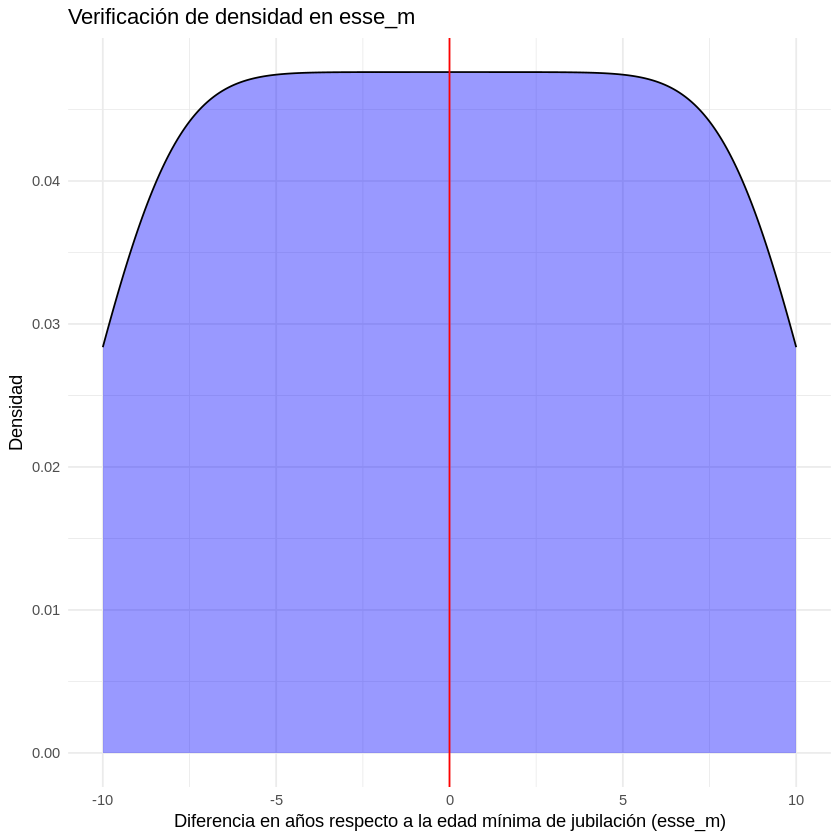

In [152]:
# Gráfico de densidad para verificar manipulación en esse_m
ggplot(base_colapsada_vird_dta, aes(x = esse_m)) +
  geom_density(fill = "blue", alpha = 0.4) +      # Curva de densidad
  geom_vline(xintercept = 0, linetype = "solid", color = "red") + # Línea en el umbral
  labs(
    title = "Verificación de densidad en esse_m",
    x = "Diferencia en años respecto a la edad mínima de jubilación (esse_m)",
    y = "Densidad"
  ) +
  theme_minimal()


Se observa una densidad continua y uniforme a través del umbral en *esse_m* = 0, lo que siguiere que no hay evidencia de manipulación de esta variable.

#### Asignación exacta del tratamiento

Respecto de este punto, en todos los gráficos se observa como la transición ocurre de forma exacta.
Todos estos puntos validan el uso del diseño sharp RD.

### Parte 1.2.2

Filtramos datos por ventanas para el análisis solicitado

In [153]:
# Filtrar por ventanas
base_10_divr_dta <- base_colapsada_vird_dta %>% filter(esse_m >= -10 & esse_m <= 10)
base_8_divr_dta <- base_colapsada_vird_dta %>% filter(esse_m >= -8 & esse_m <= 8)
base_6_divr_dta <- base_colapsada_vird_dta %>% filter(esse_m >= -6 & esse_m <= 6)
base_3_divr_dta <- base_colapsada_vird_dta %>% filter(esse_m >= -3 & esse_m <= 3)


Revisamos los datos en caso de cualquier cosa

In [154]:
# Revisar
summary(base_10_divr_dta)
summary(base_8_divr_dta)
summary(base_6_divr_dta)
summary(base_3_divr_dta)


      anno          esse_m       lnc_mean       lncn_mean     lnconsal_mean  
 Min.   :1993   Min.   :-10   Min.   :9.523   Min.   :9.467   Min.   :5.893  
 1st Qu.:1995   1st Qu.: -5   1st Qu.:9.727   1st Qu.:9.667   1st Qu.:6.023  
 Median :1999   Median :  0   Median :9.795   Median :9.723   Median :6.108  
 Mean   :1999   Mean   :  0   Mean   :9.795   Mean   :9.727   Mean   :6.101  
 3rd Qu.:2002   3rd Qu.:  5   3rd Qu.:9.860   3rd Qu.:9.797   3rd Qu.:6.171  
 Max.   :2004   Max.   : 10   Max.   :9.995   Max.   :9.921   Max.   :6.369  
 porcentajeretirados  elig_m_mean     acontrib_m_mean  educ_m_mean   
 Min.   :0.00000     Min.   :0.0000   Min.   :24.78   Min.   :2.390  
 1st Qu.:0.05884     1st Qu.:0.0000   1st Qu.:29.36   1st Qu.:2.900  
 Median :0.33514     Median :0.0000   Median :31.49   Median :3.094  
 Mean   :0.40061     Mean   :0.4762   Mean   :31.34   Mean   :3.149  
 3rd Qu.:0.70147     3rd Qu.:1.0000   3rd Qu.:33.56   3rd Qu.:3.322  
 Max.   :0.98611     Max.   :1.000

      anno          esse_m      lnc_mean       lncn_mean     lnconsal_mean  
 Min.   :1993   Min.   :-8   Min.   :9.523   Min.   :9.467   Min.   :5.893  
 1st Qu.:1995   1st Qu.:-4   1st Qu.:9.745   1st Qu.:9.679   1st Qu.:6.030  
 Median :1999   Median : 0   Median :9.797   Median :9.725   Median :6.103  
 Mean   :1999   Mean   : 0   Mean   :9.799   Mean   :9.731   Mean   :6.102  
 3rd Qu.:2002   3rd Qu.: 4   3rd Qu.:9.855   3rd Qu.:9.797   3rd Qu.:6.171  
 Max.   :2004   Max.   : 8   Max.   :9.995   Max.   :9.921   Max.   :6.369  
 porcentajeretirados  elig_m_mean     acontrib_m_mean  educ_m_mean   
 Min.   :0.00000     Min.   :0.0000   Min.   :26.26   Min.   :2.390  
 1st Qu.:0.09412     1st Qu.:0.0000   1st Qu.:29.83   1st Qu.:2.900  
 Median :0.33514     Median :0.0000   Median :31.79   Median :3.080  
 Mean   :0.40621     Mean   :0.4706   Mean   :31.75   Mean   :3.123  
 3rd Qu.:0.70128     3rd Qu.:1.0000   3rd Qu.:34.00   3rd Qu.:3.301  
 Max.   :0.98611     Max.   :1.0000   Max

      anno          esse_m      lnc_mean       lncn_mean     lnconsal_mean  
 Min.   :1993   Min.   :-6   Min.   :9.617   Min.   :9.549   Min.   :5.900  
 1st Qu.:1995   1st Qu.:-3   1st Qu.:9.754   1st Qu.:9.688   1st Qu.:6.046  
 Median :1999   Median : 0   Median :9.799   Median :9.727   Median :6.103  
 Mean   :1999   Mean   : 0   Mean   :9.802   Mean   :9.735   Mean   :6.100  
 3rd Qu.:2002   3rd Qu.: 3   3rd Qu.:9.851   3rd Qu.:9.795   3rd Qu.:6.168  
 Max.   :2004   Max.   : 6   Max.   :9.995   Max.   :9.921   Max.   :6.369  
 porcentajeretirados  elig_m_mean     acontrib_m_mean  educ_m_mean   
 Min.   :0.01493     Min.   :0.0000   Min.   :27.55   Min.   :2.536  
 1st Qu.:0.14286     1st Qu.:0.0000   1st Qu.:30.12   1st Qu.:2.942  
 Median :0.33514     Median :0.0000   Median :32.25   Median :3.066  
 Mean   :0.40937     Mean   :0.4615   Mean   :32.11   Mean   :3.100  
 3rd Qu.:0.70128     3rd Qu.:1.0000   3rd Qu.:34.16   3rd Qu.:3.256  
 Max.   :0.94643     Max.   :1.0000   Max

      anno          esse_m      lnc_mean       lncn_mean     lnconsal_mean  
 Min.   :1993   Min.   :-3   Min.   :9.629   Min.   :9.568   Min.   :5.945  
 1st Qu.:1995   1st Qu.:-2   1st Qu.:9.761   1st Qu.:9.691   1st Qu.:6.051  
 Median :1999   Median : 0   Median :9.807   Median :9.729   Median :6.103  
 Mean   :1999   Mean   : 0   Mean   :9.808   Mean   :9.738   Mean   :6.105  
 3rd Qu.:2002   3rd Qu.: 2   3rd Qu.:9.855   3rd Qu.:9.796   3rd Qu.:6.170  
 Max.   :2004   Max.   : 3   Max.   :9.962   Max.   :9.902   Max.   :6.268  
 porcentajeretirados  elig_m_mean     acontrib_m_mean  educ_m_mean   
 Min.   :0.04211     Min.   :0.0000   Min.   :27.55   Min.   :2.536  
 1st Qu.:0.21202     1st Qu.:0.0000   1st Qu.:32.04   1st Qu.:2.969  
 Median :0.33514     Median :0.0000   Median :33.17   Median :3.054  
 Mean   :0.40821     Mean   :0.4286   Mean   :32.84   Mean   :3.056  
 3rd Qu.:0.64678     3rd Qu.:1.0000   3rd Qu.:34.22   3rd Qu.:3.203  
 Max.   :0.88889     Max.   :1.0000   Max

Ajustamos los modelos según lo solicitado en el enunciado

In [155]:
# Modelo 1: Sin controles
model_1_divr_dta <- lm(lnc_mean ~ elig_m_mean + esse_m + I(esse_m * elig_m_mean), data = base_10_divr_dta)

# Modelo 2: Con controles
model_2_divr_dta <- lm(lnc_mean ~ elig_m_mean + esse_m + I(esse_m * elig_m_mean) + acontrib_m_mean + educ_m_mean + sizemun_mean + pf_mean, data = base_10_divr_dta)

# Modelos 3, 4 y 5: Con controles, distintas ventanas
model_3_divr_dta <- lm(lnc_mean ~ elig_m_mean + esse_m + I(esse_m * elig_m_mean) + acontrib_m_mean + educ_m_mean + sizemun_mean + pf_mean, data = base_8_divr_dta)
model_4_divr_dta <- lm(lnc_mean ~ elig_m_mean + esse_m + I(esse_m * elig_m_mean) + acontrib_m_mean + educ_m_mean + sizemun_mean + pf_mean, data = base_6_divr_dta)
model_5_divr_dta <- lm(lnc_mean ~ elig_m_mean + esse_m + I(esse_m * elig_m_mean) + acontrib_m_mean + educ_m_mean + sizemun_mean + pf_mean, data = base_3_divr_dta)


In [156]:
summary(model_1_divr_dta)


Call:
lm(formula = lnc_mean ~ elig_m_mean + esse_m + I(esse_m * elig_m_mean), 
    data = base_10_divr_dta)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.185584 -0.056198 -0.003678  0.046188  0.177003 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              9.832062   0.016126 609.697   <2e-16 ***
elig_m_mean             -0.047807   0.025327  -1.888   0.0615 .  
esse_m                  -0.005390   0.002726  -1.977   0.0503 .  
I(esse_m * elig_m_mean) -0.005477   0.004164  -1.315   0.1908    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07003 on 122 degrees of freedom
Multiple R-squared:  0.5193,	Adjusted R-squared:  0.5075 
F-statistic: 43.94 on 3 and 122 DF,  p-value: < 2.2e-16


In [157]:
summary(model_2_divr_dta)


Call:
lm(formula = lnc_mean ~ elig_m_mean + esse_m + I(esse_m * elig_m_mean) + 
    acontrib_m_mean + educ_m_mean + sizemun_mean + pf_mean, data = base_10_divr_dta)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.147160 -0.040906  0.000769  0.032751  0.158131 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              9.221e+00  1.801e-01  51.184  < 2e-16 ***
elig_m_mean             -3.914e-02  2.201e-02  -1.779  0.07788 .  
esse_m                  -6.727e-03  3.808e-03  -1.766  0.07990 .  
I(esse_m * elig_m_mean) -1.804e-03  4.638e-03  -0.389  0.69798    
acontrib_m_mean          9.856e-03  3.728e-03   2.644  0.00931 ** 
educ_m_mean              1.018e-01  2.122e-02   4.799 4.71e-06 ***
sizemun_mean            -3.781e-02  4.330e-02  -0.873  0.38435    
pf_mean                  5.152e-06  3.403e-06   1.514  0.13276    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05994 o

In [158]:
summary(model_3_divr_dta)


Call:
lm(formula = lnc_mean ~ elig_m_mean + esse_m + I(esse_m * elig_m_mean) + 
    acontrib_m_mean + educ_m_mean + sizemun_mean + pf_mean, data = base_8_divr_dta)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.147544 -0.042510  0.004543  0.035199  0.154637 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              9.354e+00  2.054e-01  45.536  < 2e-16 ***
elig_m_mean             -3.600e-02  2.512e-02  -1.433 0.155200    
esse_m                  -6.936e-03  4.664e-03  -1.487 0.140303    
I(esse_m * elig_m_mean) -2.158e-03  6.249e-03  -0.345 0.730664    
acontrib_m_mean          7.324e-03  4.096e-03   1.788 0.076957 .  
educ_m_mean              9.066e-02  2.612e-02   3.471 0.000784 ***
sizemun_mean            -5.082e-02  5.089e-02  -0.999 0.320529    
pf_mean                  5.057e-06  3.854e-06   1.312 0.192677    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06155 on

In [159]:
summary(model_4_divr_dta)


Call:
lm(formula = lnc_mean ~ elig_m_mean + esse_m + I(esse_m * elig_m_mean) + 
    acontrib_m_mean + educ_m_mean + sizemun_mean + pf_mean, data = base_6_divr_dta)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.116469 -0.043909 -0.001108  0.032390  0.168781 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              9.450e+00  2.288e-01  41.294   <2e-16 ***
elig_m_mean             -5.148e-02  3.009e-02  -1.711   0.0916 .  
esse_m                  -5.107e-03  6.639e-03  -0.769   0.4444    
I(esse_m * elig_m_mean)  6.872e-04  9.693e-03   0.071   0.9437    
acontrib_m_mean          5.781e-03  4.637e-03   1.247   0.2166    
educ_m_mean              8.612e-02  3.304e-02   2.606   0.0112 *  
sizemun_mean            -7.677e-02  6.255e-02  -1.227   0.2238    
pf_mean                  6.633e-06  4.869e-06   1.362   0.1775    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06343 on

In [160]:
# Crear la lista de modelos
models_divr_dta <- list(
  "Modelo 1" = model_1_divr_dta,
  "Modelo 2 (10)" = model_2_divr_dta,
  "Modelo 3 (8)" = model_3_divr_dta,
  "Modelo 4 (6)" = model_4_divr_dta,
  "Modelo 5 (3)" = model_5_divr_dta
)

# Generar la tabla con significancia destacada
modelsummary(
  models_divr_dta,
  stars = TRUE,  # Incluir los niveles de significancia
  output = "markdown"
)




+-------------------------+----------+---------------+--------------+--------------+--------------+
|                         | Modelo 1 | Modelo 2 (10) | Modelo 3 (8) | Modelo 4 (6) | Modelo 5 (3) |
+=========================+==========+===============+==============+==============+==============+
| (Intercept)             | 9.832*** | 9.221***      | 9.354***     | 9.450***     | 9.520***     |
+-------------------------+----------+---------------+--------------+--------------+--------------+
|                         | (0.016)  | (0.180)       | (0.205)      | (0.229)      | (0.352)      |
+-------------------------+----------+---------------+--------------+--------------+--------------+
| elig_m_mean             | -0.048+  | -0.039+       | -0.036       | -0.051+      | -0.088+      |
+-------------------------+----------+---------------+--------------+--------------+--------------+
|                         | (0.025)  | (0.022)       | (0.025)      | (0.030)      | (0.050)      |

### Parte 1.2.3

En primera instancia se puede observar que el valor de *elig_m_mean* es negativo en todos los modelos, lo que indica que la elegibilidad reduce el consumo promedio, sin embargo, los niveles de significancia no son considerables para un análisis.

Respecto de los controles, para el caso de *acontrib_m_mean* (años promedio de contribución a la pensión) se tiene un coeficiente positivo y significativo para el modelo 2, lo cuál sugiere que un mayor tiempo de contribución está asociado a un mayor consumo promedio. El que no haya un valor significante en los otros modelos señala que las ventanas reducidad (menor número de observaciones) reducen la capacidad de análisis.

La variable de control *educ_m_mean* (nivel de educación promedio) tiene un coefeciente positivo y con altos nivel de significancia en los modelos con ventanas más amplias, esto señala que a mayor educación tiene a haber un mayor consumo promedio, debido a los mejores ingresos o decisiones de consumo planificadas dados sus conocimientos .

En los casos de *sizemun_mean* y *pf_mean* no hay relevancia para los modelos por lo que se sugiere que no existe impacto de estas variables en el consumo de los hogares.

Respecto de los modelos en general, el modelo que mejor resultado tienen son aquellos de ventanas más amplias y con las variables de control incorporadas, siendo el modelo 2 el mejor entre los 4.


## Parte 1.3: Diseño de Variables Instrumentales

### 1.3.1

Para el diseño de variables instrumentales (IV) hay que cumplir con los siguientes supuestos:
* Relevancia del instrumento: el instrumento (*elegibilidad*) debe estar fuertemente correlacionado con la variable endógena (*porcentajeretirados*)
* Exogeneidad del instrumento: EL instrumento debe ser independiente de los factores no observados que afectan la variable dependiente (*lnc*)
* Exclusión del instrumento: El instrumento debe afectar la variable dependiente (*lnc*) solo a través de su impacto en la variable endógena (*porcentajeretirados*)

**Relevancia del instrumento:**

In [161]:
# Modelo de relevancia del instrumento
model_relevancia_divr_data_3 <- lm(porcentajeretirados ~ elig_m_mean + esse_m + educ_m_mean + sizemun_mean + acontrib_m_mean,
                       data = base_agrupada_vird_dta)

summary(model_relevancia_divr_data_3)



Call:
lm(formula = porcentajeretirados ~ elig_m_mean + esse_m + educ_m_mean + 
    sizemun_mean + acontrib_m_mean, data = base_agrupada_vird_dta)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38671 -0.04312  0.00243  0.05142  0.30368 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.4099158  0.0494539   8.289 1.00e-15 ***
elig_m_mean      0.5456203  0.0157025  34.747  < 2e-16 ***
esse_m           0.0090005  0.0004972  18.101  < 2e-16 ***
educ_m_mean     -0.0258440  0.0092142  -2.805  0.00523 ** 
sizemun_mean    -0.0184050  0.0127378  -1.445  0.14909    
acontrib_m_mean -0.0049071  0.0008662  -5.665 2.45e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.08534 on 514 degrees of freedom
Multiple R-squared:  0.9634,	Adjusted R-squared:  0.963 
F-statistic:  2703 on 5 and 514 DF,  p-value: < 2.2e-16


El coeficiente significativo y el excelente ajuste del modelo evidencian que *elig_m_mean* es un predictor robusto de *procentajeretirados* lo que confirma la relevancia del instrumento.

**Exogeneridad del instrumento**

La *elegibilidad* depende de la edad mínima de jubilación y no está influenciado por decisiones individuales de los individuos y otros errores no observados

In [186]:
# Prueba de Wu-Hausman usando residuals
residuals_iv <- residuals(model_iv)
residuals_ols <- residuals(model_ols)

# Regresión de los residuos
hausman_test <- lm(residuals_iv ~ residuals_ols)
summary(hausman_test)





Call:
lm(formula = residuals_iv ~ residuals_ols)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.017566 -0.007137 -0.002773  0.005882  0.026595 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.492e-15  4.107e-04     0.0        1    
residuals_ols  1.000e+00  2.572e-03   388.7   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.009365 on 518 degrees of freedom
Multiple R-squared:  0.9966,	Adjusted R-squared:  0.9966 
F-statistic: 1.511e+05 on 1 and 518 DF,  p-value: < 2.2e-16


Esta prueba de Hausman evalua diferencias significativas entre las estimaciones del modelo IV y el modelo OLS (Mínimos Cuadrados Ordinarios), comparamos los reciduos para verificar endogeneidad.

Los resultados de esta prueba respaldan que no hay evidencia de endogeneidad, esto observando el intercepto con un valor no significativo y practicamente nulo, lo cuál indica ausencia de riesgo sistemático entre los residuos. Además un valor de 1 en el estimado indica perfecta alineación.


**Exclusión del instrumento**

In [187]:
# Modelo ampliado que incluye el instrumento como predictor
model_exclusion <- lm(lnc_mean ~ porcentajeretirados + elig_m_mean + educ_m_mean + sizemun_mean + acontrib_m_mean,
                      data = base_agrupada_vird_dta)

# Resumen del modelo
summary(model_exclusion)



Call:
lm(formula = lnc_mean ~ porcentajeretirados + elig_m_mean + educ_m_mean + 
    sizemun_mean + acontrib_m_mean, data = base_agrupada_vird_dta)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.27182 -0.04585  0.01249  0.07702  0.62311 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          9.233374   0.075257 122.691  < 2e-16 ***
porcentajeretirados -0.487509   0.064465  -7.562 1.83e-13 ***
elig_m_mean          0.129448   0.051573   2.510   0.0124 *  
educ_m_mean          0.107531   0.016898   6.364 4.37e-10 ***
sizemun_mean        -0.053623   0.023788  -2.254   0.0246 *  
acontrib_m_mean      0.012200   0.001081  11.286  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1596 on 514 degrees of freedom
Multiple R-squared:  0.3042,	Adjusted R-squared:  0.2974 
F-statistic: 44.94 on 5 and 514 DF,  p-value: < 2.2e-16


En este modelo evaluamos si el instrumento tiene un impacto directo sobre la variable dependiente. Los resultados muestran que elig_m_mean es estadísticamente significativo en su relación con lnc, lo que sugiere que el instrumento podría estar violando el supuesto de exclusión.

Esta situación plantea dudas sobre la validez del modelo IV. Sin embargo, desde una perspectiva teórica, elig_m_mean representa únicamente la elegibilidad, que afecta indirectamente al consumo a través de su impacto en el porcentaje de retirados, el cual es la verdadera variable endógena que, según la hipótesis, influye en los ingresos. Por lo tanto, esta interpretación teórica justifica la continuidad del análisis con el modelo IV.

### 1.3.2

In [188]:
# Modelos OLS
model_1_divr_dta <- lm(lnc_mean ~ porcentajeretirados, data = base_agrupada_vird_dta)
model_2_divr_dta <- lm(lnc_mean ~ porcentajeretirados + educ_m_mean + sizemun_mean + acontrib_m_mean, data = base_agrupada_vird_dta)

# Modelos ITT (Intención a tratar)
model_3_divr_dta <- lm(lnc_mean ~ elig_m_mean, data = base_agrupada_vird_dta)
model_4_divr_dta <- lm(lnc_mean ~ elig_m_mean + educ_m_mean + sizemun_mean + acontrib_m_mean, data = base_agrupada_vird_dta)

# Modelos 2SLS (IV)
model_5_divr_dta <- ivreg(lnc_mean ~ porcentajeretirados | elig_m_mean, data = base_agrupada_vird_dta)
model_6_divr_dta <- ivreg(lnc_mean ~ porcentajeretirados + educ_m_mean + sizemun_mean + acontrib_m_mean |
                 elig_m_mean + educ_m_mean + sizemun_mean + acontrib_m_mean,
                 data = base_agrupada_vird_dta)


In [191]:

# Lista de modelos
models_divr_dta_3 <- list(
  "Modelo 1 (OLS sin controles)" = model_1_divr_dta,
  "Modelo 2 (OLS con controles)" = model_2_divr_dta,
  "Modelo 3 (ITT sin controles)" = model_3_divr_dta,
  "Modelo 4 (ITT con controles)" = model_4_divr_dta,
  "Modelo 5 (2SLS sin controles)" = model_5_divr_dta,
  "Modelo 6 (2SLS con controles)" = model_6_divr_dta
)

# Crear la tabla
modelsummary(models_divr_dta_3,
  stars = TRUE,  # Incluir los niveles de significancia
  output = "markdown"
)



+---------------------+------------------------------+------------------------------+------------------------------+------------------------------+-------------------------------+-------------------------------+
|                     | Modelo 1 (OLS sin controles) | Modelo 2 (OLS con controles) | Modelo 3 (ITT sin controles) | Modelo 4 (ITT con controles) | Modelo 5 (2SLS sin controles) | Modelo 6 (2SLS con controles) |
+=====================+==============================+==============================+==============================+==============================+===============================+===============================+
| (Intercept)         | 9.761***                     | 9.262***                     | 9.755***                     | 9.290***                     | 9.760***                      | 9.255***                      |
+---------------------+------------------------------+------------------------------+------------------------------+------------------------------+----

### 1.3.3

En primer lugar respecto de los modelos OLS (1 y 2) se tiene que el modelo 1 el efecto de *porcentajeretirados* sobre *lmc_mean* es negativo y altamente significativo, el modelo 2 por su parte igualmente alta significativo muestra un incremente del efecto de esta variable sobre *lmc*, además este modelo explica mejor el *lmc_mean* por lo que incluir las variables de control *educ_m_mean*, *sizesum_mean* y *contrib_m_mean* resulta escencial para un correcto análisis.

Con los modelos ITT (3 y 4) en el modelo 3 se tiene que *elig_m_mean* tiene un efecto negativo y significativo sobre *lnc_mean*, por su parte, el modelo 4 vuelve este efecto mucho más pronunciado posiblemente dada la incorporación de controles. Respecto de la efectividad de los modelos los valores de $R^{2}$ 0.099 y 0.227 dan a entender que la incorporación de otras variables de control es escencial para tener un modelo adecuado y utilizable.

Finalmente los modelos 2SLS (5 y 6) muestran que el impacto de *porcentajeretirados* sobre *lmc_mean* mediante IV es significativo siendo más pronunciado en el modelo con controles, además la cercanía de los valores con los obtenidos en OLS entrega consitencia a los resultados, esta situación se repite para el resto de las variables de control con niveles similares de significancia y efecto, además de un $R^{2}$ de igual magnitud.

De los resultados de los modelos entonces se puede deducir que existe una relación negativa entre el porcentaje de retirados y el consumo promedio, que la elegibilidad afecta negativamente el consumo promedio y que la inclusión de controles mejoran la presición y robustez de los modelos.

### 1.4.1 Conclusión


Los modelos estimados a lo largo del análisis muestran un efecto negativo y significativo de la jubilación sobre el consumo promedio de los hogares. Este efecto se intensifica al incorporar controles adicionales en los modelos, lo que refuerza la importancia de considerar factores como el nivel educativo, las características del entorno y los años de contribución al sistema de pensiones.

En cuanto a la validez interna, los supuestos requeridos para los diseños de regresión discontinua (RD) y variables instrumentales (IV) fueron evaluados detalladamente. Los resultados indican que ambos métodos capturan de forma adecuada la relación causal entre la jubilación y el consumo. Sin embargo, aunque el instrumento *elig_m_mean* resultó relevante, surgieron dudas en el caso del modelo IV debido a las limitaciones observadas en el cumplimiento del supuesto de exclusión.

Respecto a la validez externa, aunque se utilizaron datos específicos y robustos, estos están limitados a un contexto geográfico y temporal particular. Esto implica que factores locales, como políticas de jubilación y sistemas de pensión, podrían no ser aplicables en otros entornos, lo que dificulta la extrapolación de los resultados a otras poblaciones. Además, la variable *elig_m_mean*, basada en la elegibilidad por edad, puede no ser directamente transferible, ya que los requisitos de jubilación varían entre países.

En términos de validez del constructo, esta se considera adecuada. La variable *lnc_mean* es apropiada para capturar el consumo promedio, aunque no distingue entre bienes durables y no durables. Por su parte, porcentajeretirados refleja adecuadamente el nivel de retiro, y *elig_m_mean* es conceptualmente sólido al ser un criterio exógeno. No obstante, sería beneficioso incorporar variables adicionales que capten factores relevantes que podrían estar siendo omitidos, como el impacto en el bienestar o cambios en el estilo de vida tras la jubilación.

En general, la evidencia respalda la hipótesis inicial: ***"El consumo del hogar se ve disminuido considerablemente con la jubilación del jefe de hogar debido a la reducción en los ingresos disponibles."***, lo que corrobora la importancia de políticas públicas que cuiden este efecto en familias, en especial cuando se trata de hogares más vulnerables.

# Parte 2

## Parte 2.1: Análisis del Efecto del Incinerador de Basura en el Precio de las Viviendas

### 2.1.a

In [213]:
# Filtrar los datos para 1981
data_1981 <- subset(data_base_diff, year == 1981)

# Regresión lineal
modelo_rprice <- lm(rprice ~ nearinc + area + baths + nbh + agesq + rooms + cbd + intst + land , data = data_1981)

# Resumen del modelo
summary(modelo_rprice)



Call:
lm(formula = rprice ~ nearinc + area + baths + nbh + agesq + 
    rooms + cbd + intst + land, data = data_1981)

Residuals:
   Min     1Q Median     3Q    Max 
-69281 -11029  -1311  10110  84705 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2185.7321 15810.9913  -0.138 0.890260    
nearinc     -6198.7214  6380.5939  -0.971 0.333078    
area           14.4393     3.4995   4.126 6.49e-05 ***
baths       15084.7936  3874.3088   3.894 0.000156 ***
nbh         -2544.3467   954.5377  -2.666 0.008647 ** 
agesq          -1.8729     0.9510  -1.969 0.051008 .  
rooms        5191.7378  2864.1225   1.813 0.072154 .  
cbd             0.3071     1.4281   0.215 0.830074    
intst          -0.5276     1.4192  -0.372 0.710665    
land            0.1163     0.1513   0.769 0.443308    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20220 on 132 degrees of freedom
Multiple R-squared:  0.6703,	Adjusted R-squared:  0.

En este caso se obseva que que estar cerca del incinerador *nearinc* tiene un efecto negativo y significativo que termina afectando el precio de las viviendas en \$6,198 dolares promedio. El área en pies cuadrados de la casa es altamente significativa como se podría esperar, así como el número de baños que tiene una implicancia de aumentar en \$15,084 en promedio el precio de una casa, la edad del immueble por su parte tiene un efecto negativo en el precio de esta y finalmente observamos que el vecindario influye significativamente en el precio de una vidienda.

Las variables no significativas soprendentemente son la cantidad de habitaciones (*rooms*), distancia al distrito central de negocios (*cbd*), distancia a la interestatal (*intst*) y área en pies cuadrados del terreno (*land*).

EL modelo explica aproximadamante un 67% de la variable de precios por lo que se podría considerar un buen modelo.

### 2.1.b

In [214]:
# Filtrar los datos para 1978
data_1978 <- subset(data_base_diff, year == 1978)

# Regresión lineal con variables de control
modelo_rprice_1978 <- lm(rprice ~ nearinc + area + baths + nbh + agesq + rooms + cbd + intst + land , data = data_1978)

# Resumen del modelo
summary(modelo_rprice_1978)



Call:
lm(formula = rprice ~ nearinc + area + baths + nbh + agesq + 
    rooms + cbd + intst + land, data = data_1978)

Residuals:
   Min     1Q Median     3Q    Max 
-61878  -7785    175   9312 140122 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.375e+04  1.385e+04  -1.715 0.088217 .  
nearinc      6.238e+03  6.121e+03   1.019 0.309606    
area         2.214e+01  3.416e+00   6.480 9.65e-10 ***
baths        9.038e+03  3.205e+03   2.820 0.005383 ** 
nbh         -9.774e+02  7.918e+02  -1.234 0.218770    
agesq       -8.142e-01  2.828e-01  -2.879 0.004506 ** 
rooms        4.173e+03  2.154e+03   1.937 0.054385 .  
cbd          1.028e+00  1.174e+00   0.876 0.382376    
intst       -7.298e-01  1.124e+00  -0.650 0.516880    
land         1.240e-01  3.333e-02   3.720 0.000271 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20220 on 169 degrees of freedom
Multiple R-squared:  0.5863,	Adjusted R-squared:  0.

In [215]:
# Lista de modelos
models_diff_2b<- list(
  "Modelo 1 (1981)" = modelo_rprice,
  "Modelo 2 (1978)" = modelo_rprice_1978
)

# Crear la tabla
modelsummary(models_diff_2b,
  stars = TRUE,  # Incluir los niveles de significancia
  output = "markdown"
)


+-------------+-----------------+-----------------+
|             | Modelo 1 (1981) | Modelo 2 (1978) |
+=============+=================+=================+
| (Intercept) | -2185.732       | -23752.878+     |
+-------------+-----------------+-----------------+
|             | (15810.991)     | (13851.794)     |
+-------------+-----------------+-----------------+
| nearinc     | -6198.721       | 6238.075        |
+-------------+-----------------+-----------------+
|             | (6380.594)      | (6121.079)      |
+-------------+-----------------+-----------------+
| area        | 14.439***       | 22.138***       |
+-------------+-----------------+-----------------+
|             | (3.500)         | (3.416)         |
+-------------+-----------------+-----------------+
| baths       | 15084.794***    | 9037.800**      |
+-------------+-----------------+-----------------+
|             | (3874.309)      | (3205.357)      |
+-------------+-----------------+-----------------+
| nbh      

En 1978, el efecto de estar cerca del incinerador era positivo y pero poco significativo, lo que señala que las viviendas cercanas a dicha área tenían un valor que dependía más de otros parámetros y consideraciones. Respecto de otras variables en general se repite el comportamieto de el modelo 1 pero hay ciertas variables que tienen ligeras diferencias, en primer lugar la cantidad de baños afectaba en menor magnitud el precio de una vivienda (cerca de \$6,000 de diferencia), la cantidad de habitaciones si tenía un efecto ligeramente significativo en el precio de una casa y el área en pies cuadrados del terreno toma una relevancia singificante en el precio de un hogar a diferencia de la situación en 1981.
Ambos modelos explican gran parte de la variable de interés con valores de $R^{2} =  0.670$ para el modelo de 1981 y $R^{2} =  0.586$ para el modelo de 1978

### 2.1.c REVISAR Y COMPLEMENTAR MAS

La regresión del apartado (a) es útil como punto de partida para el análisis; sin embargo, no es adecuada para estimar de manera concluyente el efecto de la ubicación del incinerador en los valores de las casas. Esto se debe a que no considera aspectos clave, como la comparación con periodos de tiempo previos, lo que impide analizar si ya existía un efecto antes de la construcción del incinerador que pudiera explicar la disminución en los valores de las casas. Además, el modelo no controla por factores externos que pudieron haber cambiado entre 1978 y 1981 y que también podrían influir en los precios.


### 2.1.d

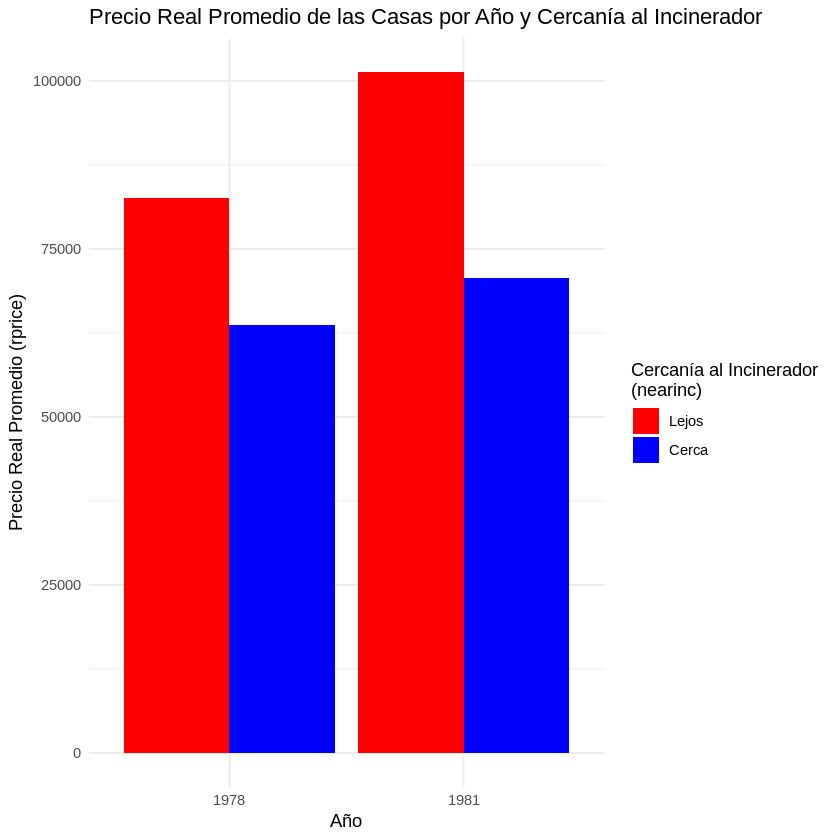

In [216]:
# Crear una base agregada para calcular promedios por año y cercanía al incinerador
data_aggregated <- data_base_diff %>%
  group_by(year, nearinc) %>%
  summarise(mean_rprice = mean(rprice, na.rm = TRUE), .groups = 'drop')

# Graficar
ggplot(data_aggregated, aes(x = factor(year), y = mean_rprice, fill = factor(nearinc))) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(
    title = "Precio Real Promedio de las Casas por Año y Cercanía al Incinerador",
    x = "Año",
    y = "Precio Real Promedio (rprice)",
    fill = "Cercanía al Incinerador\n(nearinc)"
  ) +
  theme_minimal() +
  scale_fill_manual(values = c("red", "blue"), labels = c("Lejos", "Cerca"))


En 1978, el precio promedio de las casas cercanas al incinerador es considerablemente menor que el de las casas ubicadas lejos de este. Esta diferencia se acentúa en 1981, donde, aunque ambos grupos muestran un aumento en sus valores, la brecha de precios entre ellos se amplía.

La existencia de diferencias preexistentes podría indicar la influencia de otros factores que no se han considerado en el análisis. Además, la falta de datos históricos más amplios impide determinar si esta situación era parte de una tendencia previa que continuó hasta 1981 o si, en efecto, la presencia del incinerador es el factor responsable de la creciente disparidad en los valores de las casas.



### 2.1.e

In [217]:
# Calcular los promedios por año y cercanía al incinerador
promedios <- data_base_diff %>%
  group_by(year, nearinc) %>%
  summarise(mean_rprice = mean(rprice, na.rm = TRUE), .groups = 'drop')

In [218]:
# Extraer los valores necesarios
y_1981_cercanas <- promedios %>% filter(year == 1981 & nearinc == 1) %>% pull(mean_rprice)
y_1978_cercanas <- promedios %>% filter(year == 1978 & nearinc == 1) %>% pull(mean_rprice)
y_1981_lejanas <- promedios %>% filter(year == 1981 & nearinc == 0) %>% pull(mean_rprice)
y_1978_lejanas <- promedios %>% filter(year == 1978 & nearinc == 0) %>% pull(mean_rprice)

In [224]:
# Calcular el estimador Diff-in-Diff
diff_in_diff <- (y_1981_cercanas - y_1978_cercanas) - (y_1981_lejanas - y_1978_lejanas)

# Crear un data.frame para una visualización más clara
resultados <- data.frame(
  Grupo = c("Casas cercanas", "Casas lejanas", "Diff-in-Diff"),
  `Promedio 1978` = c(y_1978_cercanas, y_1978_lejanas, NA),
  `Promedio 1981` = c(y_1981_cercanas, y_1981_lejanas, NA),
  `Cambio (1981 - 1978)` = c(
    y_1981_cercanas - y_1978_cercanas,
    y_1981_lejanas - y_1978_lejanas,
    diff_in_diff
  )
)

# Formatear los resultados como tabla
library(knitr)
kable(resultados, format = "markdown", digits = 2, col.names = c("Grupo", "Promedio 1978", "Promedio 1981", "Cambio (1981 - 1978)"))




|Grupo          | Promedio 1978| Promedio 1981| Cambio (1981 - 1978)|
|:--------------|-------------:|-------------:|--------------------:|
|Casas cercanas |      63692.86|      70619.24|              6926.38|
|Casas lejanas  |      82517.23|     101307.51|             18790.29|
|Diff-in-Diff   |            NA|            NA|            -11863.90|

El estimador de diferencia en diferencias es de -11,864, lo cuál indica que las casas cercanas al incinerador experimentarion una reducción de \$11,864 promedio en su precio real relativo a las casas lejanas, debido al incinerador según la información que se maneja hasta ahora.

### 2.1.f

In [225]:
# Crear variable año como binaria (1 = 1981, 0 = 1978)
data_base_diff$year_bin <- ifelse(data_base_diff$year == 1981, 1, 0)

# Modelo de regresión Diff-in-Diff
modelo_diff_in_diff <- lm(rprice ~ year_bin + nearinc + year_bin:nearinc, data = data_base_diff)

# Resumen del modelo
summary(modelo_diff_in_diff)



Call:
lm(formula = rprice ~ year_bin + nearinc + year_bin:nearinc, 
    data = data_base_diff)

Residuals:
   Min     1Q Median     3Q    Max 
-60678 -17693  -3031  12483 236307 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         82517       2727  30.260  < 2e-16 ***
year_bin            18790       4050   4.640 5.12e-06 ***
nearinc            -18824       4875  -3.861 0.000137 ***
year_bin:nearinc   -11864       7457  -1.591 0.112595    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 30240 on 317 degrees of freedom
Multiple R-squared:  0.1739,	Adjusted R-squared:  0.1661 
F-statistic: 22.25 on 3 and 317 DF,  p-value: 4.224e-13


La regresión se construye tomando en cuenta solo los parámetros de el año de análisis, la distancia al incinerador y una variable *year_bin:nearinc* que toma en cuenta el cambio relativo en los precios de las casas cercanas respecto a las lejanas.

Según este modelo, la magnitud del efecto en la interacción *year_bin:nearinc*  coincide con el estimador diff-in-diff, sin embargo el efecto no es significativo, lo que indica que no se puede concluir que el incinerador tuvo un efecto en la baja de precios.

Los efectos más significativos se dan debido a la distancia hacia el incinerador lo que puede ser debido a situaciones propias de la zona/ubicación de las viviendas. Aún con todo lo dicho anteriormente, el modelo tiene un $R^{2}$ ajutado de tan solo 16%$, lo que indica que hay factores que no están tomando en consideración por limitaciones de los datos o del modelo.

## Parte 2.2: Análisis de la Influencia de la Distancia al Incinerador sobre el Precio de las Viviendas

### 2.2.a

In [226]:
# Estimar el modelo con la interacción y81:log(dist)
modelo_dist <- lm(rprice ~ y81 + ldist + y81:ldist, data = data_base_diff)

# Resumen del modelo
summary(modelo_dist)



Call:
lm(formula = rprice ~ y81 + ldist + y81:ldist, data = data_base_diff)

Residuals:
   Min     1Q Median     3Q    Max 
-60836 -18650  -4472  15988 227334 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -113580      45210  -2.512   0.0125 *  
y81           -55829      71587  -0.780   0.4360    
ldist          19303       4582   4.213  3.3e-05 ***
y81:ldist       7394       7273   1.017   0.3101    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 30430 on 317 degrees of freedom
Multiple R-squared:  0.1638,	Adjusted R-squared:  0.1558 
F-statistic: 20.69 on 3 and 317 DF,  p-value: 2.866e-12


Este modelo incorpora el coeficiente *y81:ldist* que mide como cambia el efecto de la distancia al incinerador sobre los precios de las casas en 1981 a diferencia de 1978.

Esta variable finamente resulta con significancia irrelevante por tanto el efecto que presenta no es considerable para el análisis, la variable que si presenta significancia y alta es el logartimo de la distancia lo que indica que un aumento en la distancia al incinerador se relaciona con precios más elevados de las viviendas. El modelo en general tienen un $R^{2} = 16%$ lo que señala que gran parte del comportamiento de los precios no se está explicando con estos datos.

### 2.2.b

In [227]:
# Estimar el modelo con las nuevas variables
modelo_completo <- lm(
  rprice ~ y81 + ldist + y81:ldist + age + agesq + rooms + baths + lintst + lland + larea,
  data = data_base_diff
)

# Resumen del modelo
summary(modelo_completo)



Call:
lm(formula = rprice ~ y81 + ldist + y81:ldist + age + agesq + 
    rooms + baths + lintst + lland + larea, data = data_base_diff)

Residuals:
   Min     1Q Median     3Q    Max 
-64099  -9574   -878   8860 162813 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.813e+05  4.980e+04  -3.641 0.000318 ***
y81         -7.406e+04  4.911e+04  -1.508 0.132598    
ldist       -4.413e+03  4.430e+03  -0.996 0.319922    
age         -6.562e+02  1.407e+02  -4.663 4.63e-06 ***
agesq        3.221e+00  8.645e-01   3.726 0.000231 ***
rooms        2.456e+03  1.722e+03   1.426 0.154760    
baths        7.883e+03  2.762e+03   2.854 0.004612 ** 
lintst      -7.695e+03  3.149e+03  -2.443 0.015111 *  
lland        9.934e+03  2.455e+03   4.047 6.56e-05 ***
larea        3.253e+04  5.158e+03   6.306 9.83e-10 ***
y81:ldist    8.633e+03  4.992e+03   1.729 0.084730 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20400 on 31

Este modelo incorpora variables que son significativas a la hora de explicar el comportamiento de los precios en las viviendas, en primer lugar tenemos que gran parte de los valores se explica por la edad de la vivienda, la cantidad de baños, el logarirmo de la ditancia a la interestatal y el logartimo del area en pies cuadrados de la casa.

En este modelo sigue sin haber evidencia de la presencia del incinerador como factor de cambio en los precios, sin embargo, tiene un $R^{2} ajustado = 0.6207$ por lo que explica cerca de un 62% del comportamiento de los precios, lo que indica que si bien las variables actuales son altamente explictivas, aún existen factores que no se están considerando que podrían ser la explicación de la diferencia de precios.



### 2.2.c

La diferencia significativa en el coeficiente de log(dist) entre la parte (a) y la parte (b) se debe a que, en el modelo (a), log(dist) está absorbiendo el efecto de características explicativas que solo son consideradas explícitamente en el modelo (b). Es importante tener en cuenta que, en algunas zonas urbanas, los hogares más pequeños tienden a ubicarse cerca del centro, mientras que los hogares más grandes suelen encontrarse en áreas periféricas.

Además, los factores que determinan el valor de una vivienda, como la seguridad, el tamaño, la calidad y la ubicación, están estrechamente relacionados con la zona en la que se encuentran. Esto implica que la distancia relativa de una casa a un punto específico puede estar correlacionada con múltiples características no modeladas en el modelo (a). En este caso, al ser log(dist) la única variable que captura este tipo de relación, termina explicando indirectamente muchos de estos aspectos y aparece con un coeficiente positivo.

Por el contrario, en el modelo (b), el efecto de log(dist) se aísla al incluir controles que capturan directamente estas características. Esto no solo reduce su importancia relativa, sino que puede invertir la dirección de su impacto. En particular, el cambio de un coeficiente positivo en (a) a negativo en (b) sugiere que, una vez controladas otras características, la distancia al incinerador podría asociarse con precios más bajos en las viviendas cercanas, indicando una relación más directa con el incinerador o con algún otro factor relacionado con la distacia que hay hacia este.